In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

with open('/Users/publicenemy989/Downloads/parkinsons/parkinsons.data', 'r') as f:
  tmp = np.genfromtxt(f,delimiter=',')
np.set_printoptions(precision=3,suppress=True)

In [34]:
#get X and y
X, y = tmp[1:, 1:], tmp[1:, -7]
X = np.delete(X, 16, 1)

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle = True, stratify = y)
print('training data size: ', X_train.shape[0])
print('testing data size: ', X_test.shape[0])

training data size:  136
testing data size:  59


In [41]:
# function defs
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

def printInfo(X, y):
  label, labelCount = np.unique(y,return_counts=True)
  print('num of classes:', len(label))
  for i in range(len(label)):
    print('class %i has %i samples'%(label[i],labelCount[i]))
  print('num of samples: ', X.shape[0])

#print the confusion matrix of the specified K value
def KNN_confusion(K):
  knn = KNeighborsClassifier(n_neighbors=(K)).fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
  
  fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  

In [36]:
from sklearn.model_selection import RepeatedKFold

def KNN(K):
    ave_acc = 0
    repeat = 40
    kfold = RepeatedKFold(n_repeats=repeat, n_splits=3, random_state=0)
    print("performing KNN K = %i\n---------------------" %K)
    best_score = 0
    best_K = 0
    for i, (train_index, test_index) in enumerate(kfold.split(X)):
        print("fold %i" %i)

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print("training set length %s, testing set length %s" %(X_train.shape, X_test.shape))
        knn = KNeighborsClassifier(n_neighbors=K).fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        score = np.round(accuracy_score(y_test, y_pred), 3)
        ave_acc += score
        print("Accuracy: %.3f" %score)
    ave_acc = ave_acc / (3 * repeat)
    print("average accuracy is %f" %ave_acc)
    return ave_acc

In [39]:
printInfo(X, y)

K = np.arange(1, 20, 1)
bestK = 0
best_score = 0
result = []
for k in K:
    score = KNN(k)
    result.append([score, k])
    if score > best_score:
        best_score = score
        bestK = k 
print("Best K is %i, accuracy is %.3f" %(bestK, best_score))

num of classes: 2
class 0 has 48 samples
class 1 has 147 samples
num of samples:  195
performing KNN K = 1
---------------------
fold 0
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.877
fold 1
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.800
fold 2
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.846
fold 3
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.877
fold 4
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.846
fold 5
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.831
fold 6
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.831
fold 7
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.754
fold 8
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.815
fold 9
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.862
fold 10
training set length (130, 22), testing set 

In [40]:
for i in result:
    print("K = %i, accuracy = %.3f" %(i[1], i[0]))

K = 1, accuracy = 0.836
K = 2, accuracy = 0.802
K = 3, accuracy = 0.834
K = 4, accuracy = 0.814
K = 5, accuracy = 0.833
K = 6, accuracy = 0.821
K = 7, accuracy = 0.816
K = 8, accuracy = 0.814
K = 9, accuracy = 0.808
K = 10, accuracy = 0.806
K = 11, accuracy = 0.807
K = 12, accuracy = 0.804
K = 13, accuracy = 0.808
K = 14, accuracy = 0.800
K = 15, accuracy = 0.803
K = 16, accuracy = 0.798
K = 17, accuracy = 0.805
K = 18, accuracy = 0.800
K = 19, accuracy = 0.803


performing KNN K = 1
---------------------
fold 0
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.877
fold 1
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.800
fold 2
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.846
fold 3
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.877
fold 4
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.846
fold 5
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.831
fold 6
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.831
fold 7
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.754
fold 8
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.815
fold 9
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.862
fold 10
training set length (130, 22), testing set length (65, 22)
Accuracy: 0.800
fold 11
training set length (130, 22), testing set len

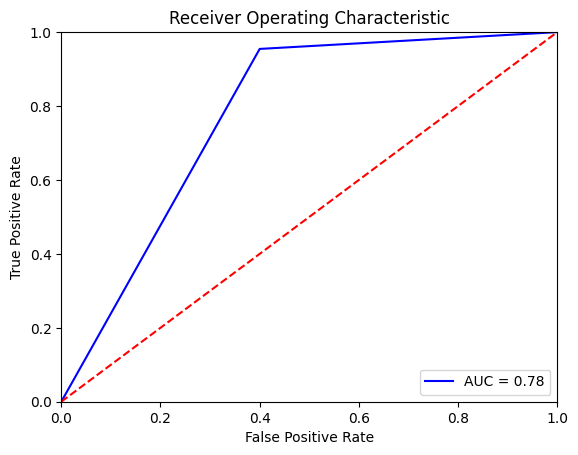

In [42]:
KNN(1)
KNN_confusion(1)